<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Biodiversity-for-food-and-agriculture---Dec-2017" data-toc-modified-id="Biodiversity-for-food-and-agriculture---Dec-2017-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Biodiversity for food and agriculture - Dec 2017</a></span><ul class="toc-item"><li><span><a href="#Pre-analysis-discussions" data-toc-modified-id="Pre-analysis-discussions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pre-analysis discussions</a></span></li><li><span><a href="#Data,-pre-processing-and-scripts" data-toc-modified-id="Data,-pre-processing-and-scripts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data, pre-processing and scripts</a></span><ul class="toc-item"><li><span><a href="#Red-List" data-toc-modified-id="Red-List-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Red List</a></span></li><li><span><a href="#Hexagon-Grid" data-toc-modified-id="Hexagon-Grid-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Hexagon Grid</a></span></li><li><span><a href="#WDPA" data-toc-modified-id="WDPA-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>WDPA</a></span></li><li><span><a href="#Script" data-toc-modified-id="Script-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Script</a></span></li></ul></li><li><span><a href="#Proposed-methodology-thinking" data-toc-modified-id="Proposed-methodology-thinking-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Proposed methodology thinking</a></span></li><li><span><a href="#Understanding-the-data" data-toc-modified-id="Understanding-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Understanding the data</a></span><ul class="toc-item"><li><span><a href="#Spatial-data-for-species-for-food-and-agriculture" data-toc-modified-id="Spatial-data-for-species-for-food-and-agriculture-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Spatial data for species for food and agriculture</a></span></li><li><span><a href="#Restricted-range-species" data-toc-modified-id="Restricted-range-species-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Restricted range species</a></span></li></ul></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Big-data-challenge" data-toc-modified-id="Big-data-challenge-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Big data challenge</a></span></li><li><span><a href="#Load-result-and-lookup-table" data-toc-modified-id="Load-result-and-lookup-table-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Load result and lookup table</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Failed-species" data-toc-modified-id="Failed-species-1.6.4.1"><span class="toc-item-num">1.6.4.1&nbsp;&nbsp;</span>Failed species</a></span></li></ul></li><li><span><a href="#Tables-and-graphs" data-toc-modified-id="Tables-and-graphs-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Tables and graphs</a></span></li></ul></li><li><span><a href="#TEST---DO-NOT-USE" data-toc-modified-id="TEST---DO-NOT-USE-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>TEST - DO NOT USE</a></span></li></ul></li></ul></div>

# Biodiversity for food and agriculture - Dec 2017

The notebook assesses the contribution of biodiversity for food and agriculture through an analysis of overlay between IUCN's Red List of Threatened Species and the World Database on Protected Areas

## Pre-analysis discussions
- all species for food and agriculture to be included, regardless of their comprehensiveness

## Data, pre-processing and scripts

### Red List
- Presence: 1 (including 2 for old range distributions); Origin: 1,2; Seasonality: all
- create index on `id_no`
- decisions to be deferred: RedList categories (threatened etc)

### Hexagon Grid
- an equal area global hex grid using the binary in [Discrete Global Grids for R](https://github.com/r-barnes/dggridR/)
- convert string ids to int ids
- create index on `id`
- additionally the grid has the following characteristics
>dggs_type ISEA3H 
>
>verbosity 1 
>
>dggs_res_spec 12
>
>densification 5
>
>max_cells_per_output_file 1000000
>
>cell_output_type SHAPEFILE
>
>cell_output_file_name ../output/hex_globe10k
>
>point_output_type SHAPEFILE
>
>point_output_file_name ../output/hex_globe_centre10k

**Filtering of the Hexagon Grid**

It is important to note that during the creation of the Hexagon Grid, cells around the 180/-180 longitude have wrapped around the globe due to a bug. These cells need to be excluded from the calculation. Fortunately, there is an easy way to identify - they all have a negative `shape_area` value in the attribute tables. These can be identified in the spatial data.

Out of 5,314,412 records, 2,427 are invalid and thus should be removed from the calculation.

![hex_grid](./hex.png)


### WDPA
- Nov 2017 release public version
- point data in the WDPA are **not** considered for reasons: a) the points do not represent the extent of PAs, leading to unquantifiable error; b) result less than 2% difference globally, with area potentially affected in Russia, Ukrain, Belarus, China and India ; c) siginifcant time required to process
- apart from the point, the pre-processing of the WDPA uses the same methodology in calculating global statistics and it can be found on the [protectedplanet](https://www.protectedplanet.net/c/calculating-protected-area-coverage).

### Script
A script is developed to distribute the workload across multiple cores. It requires the `arcpy` site package to programmatically apply `SelectByLocation`. After each iteration, it appends the output to a compressed csv file. The script is shared on [github](https://github.com/Yichuans/geoprocessing/blob/master/species_richness/FAO_BFA.py)


## Proposed methodology thinking

In short the methodology
- use a 10km by 10km global grid (hex or regular)
- use the above grid to bin each and every species 
- use the above grid to bin each and every protected area

result will enable further interogation of species and protected area at 100sqkm resolution, without undertaking any additional spatial analysis

The above result will produce the following metrics:
- Species range (at 100 sqkm reso)
- Range of each species protected. Per species level, area (number of cell x cellsize) and how much of that *is protected* (number of cell shared by species + pa/total number of cells by species)
- Combining the two, we will be able to produce the *Rodrigues 2004* graph, i.e. species with different targets
- Heatmap of number of species protected?


**THINKING: **

**Can we justify the methodology (grid approach 10km by 10km) by saying the species has a *protected status* if it overlaps with a protected areas or within 10km of a protected area? Also considering the inaccruacy of the RedList EOO data and the inaccruacy of global protected areas network. **


## Understanding the data

In [2]:
import numpy as np
import pandas as pd

In [99]:
%matplotlib inline

In [3]:
sis = pd.read_csv('sis_2017.csv')

In [4]:
bfa = pd.read_csv('Food_FAO_2017_2.csv', delimiter=';')

In [5]:
sis.head()

,objectid,id_no,binomial,presence,origin,seasonal,compiler,year,citation,source,...,tax_comm,kingdom,phylum,class,order_,family,genus,code,shape_length,shape_area
0,10143,190868.0,Nihonogomphus thomassoni,2,1,1,Kate Saunders,2011,"Asia freshwater biodiversity assessments, IUCN",Red List assessment,...,NaN,ANIMALIA,ARTHROPODA,INSECTA,ODONATA,GOMPHIDAE,Nihonogomphus,LC,99.744070,27.275351
1,10144,190868.0,Nihonogomphus thomassoni,1,1,1,FBU,2011,IUCN (International Union for Conservation of ...,NaN,...,NaN,ANIMALIA,ARTHROPODA,INSECTA,ODONATA,GOMPHIDAE,Nihonogomphus,LC,2.133768,0.093543
2,10145,190868.0,Nihonogomphus thomassoni,1,1,1,DO Manh Cuong,2010,"Asia freshwater biodiversity assessments, IUCN",unknown,...,NaN,ANIMALIA,ARTHROPODA,INSECTA,ODONATA,GOMPHIDAE,Nihonogomphus,LC,4.357552,0.301940
3,10146,190868.0,Nihonogomphus thomassoni,1,1,1,DO Manh Cuong,2010,"Asia freshwater biodiversity assessments, IUCN",Red List assessment,...,NaN,ANIMALIA,ARTHROPODA,INSECTA,ODONATA,GOMPHIDAE,Nihonogomphus,LC,6.100119,0.527099
4,10147,63940.0,Tantilla coronadoi,1,1,1,NatureServe and IUCN,2007,NatureServe and IUCN (International Union for ...,NaN,...,NaN,ANIMALIA,CHORDATA,REPTILIA,SQUAMATA,COLUBRIDAE,Tantilla,LC,0.789530,0.049604


In [6]:
print('The number of database rows of species id 137: {}'.format(sis[sis.id_no==137].id_no.count()))

The number of database rows of species id 137: 13


It is important to understand that the `sis` table, i.e., the attribute table of the spatial data, contain potentially both multi-part polygons as well as single-part polygons (probably due to different sources + range polygons with different presence, origin and seasonality). 

There may also be a possiblity that these rows may be overlapping.

Setting the indices for both datasets. Make sure the ids are integer. Also clean the tables, to reduce size

In [782]:
sis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78042 entries, 0 to 78041
Data columns (total 25 columns):
objectid        78042 non-null int64
id_no           78042 non-null float64
binomial        78042 non-null object
presence        78042 non-null int64
origin          78042 non-null int64
seasonal        78042 non-null int64
compiler        76165 non-null object
year            78042 non-null int64
citation        78038 non-null object
source          24156 non-null object
dist_comm       947 non-null object
island          7320 non-null object
subspecies      1197 non-null object
subpop          186 non-null object
legend          78042 non-null object
tax_comm        426 non-null object
kingdom         78042 non-null object
phylum          78042 non-null object
class           78042 non-null object
order_          78042 non-null object
family          78042 non-null object
genus           78042 non-null object
code            78042 non-null object
shape_length    78042 non-nul

In [8]:
sis.id_no.max()

117582065.0

Choose 4 bytes for the ID field. The largest `id_no` is less than the largest value of `uint32`

In [237]:
int_types = ["uint8", "int8", "int16", "uint16", "uint32", "int32", 'int64']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -

In [76]:
sis_columns=['id_no', 'kingdom', 'phylum', 'class', 'order_', 'family', 'genus', 'code', 'shape_area']
sis_clean = pd.DataFrame(sis[sis_columns])
sis_clean = sis_clean.astype(dtype={"id_no": "uint32",
                                    'kingdom': "category",
                                    'phylum': "category",
                                     'class': "category",
                                     'order_': "category",
                                     'family': "category",
                                     'genus': "category",
                                     'code': "category"})
# sis_clean = sis_clean.set_index('id_no')

In [77]:
sis_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78042 entries, 0 to 78041
Data columns (total 9 columns):
id_no         78042 non-null uint32
kingdom       78042 non-null category
phylum        78042 non-null category
class         78042 non-null category
order_        78042 non-null category
family        78042 non-null category
genus         78042 non-null category
code          78042 non-null category
shape_area    78042 non-null float64
dtypes: category(7), float64(1), uint32(1)
memory usage: 2.1 MB


After the data cleaning process, the size of the `sis` table has reduced from 14.9+MB to 2.1MB. All essential information is retained and the number of rows stays the same

In [78]:
sis.index.size == sis_clean.index.size

True

In [79]:
sis.id_no.max()

117582065.0

In [14]:
bfa.head()

,id,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,species_name,scientific_name,authority,infra_rank,infra_name,infra_authority,category,criteria,publicationyear,main_common_name,value,REF,DESCRIPTION
0,9,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Aaptosyax,grypus,Aaptosyax grypus,"Rainboth, 1991",NaN,NaN,NaN,CR,A2acd,2011,Mekong Giant Salmon Carp,1,1,Food - human
1,137,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,celebensis,Acerodon celebensis,"Peters, 1867",NaN,NaN,NaN,VU,A2d,2016,Sulawesi Fruit Bat,1,1,Food - human
2,138,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,humilis,Acerodon humilis,"K. Andersen, 1909",NaN,NaN,NaN,EN,"B1ab(iii,v)",2016,Talaud Fruit Bat,1,1,Food - human
3,139,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,jubatus,Acerodon jubatus,"(Eschscholtz, 1831)",NaN,NaN,NaN,EN,A2cd,2016,Golden-capped Fruit Bat,1,1,Food - human
4,140,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,leucotis,Acerodon leucotis,"(Sanborn, 1950)",NaN,NaN,NaN,VU,A4cd,2008,Palawan Fruit Bat,1,1,Food - human


In [15]:
bfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11396 entries, 0 to 11395
Data columns (total 20 columns):
id                  11396 non-null int64
kingdom_name        11396 non-null object
phylum_name         11396 non-null object
class_name          11396 non-null object
order_name          11396 non-null object
family_name         11396 non-null object
genus_name          11396 non-null object
species_name        11396 non-null object
scientific_name     11396 non-null object
authority           11380 non-null object
infra_rank          126 non-null object
infra_name          126 non-null object
infra_authority     0 non-null float64
category            11396 non-null object
criteria            1899 non-null object
publicationyear     11396 non-null int64
main_common_name    8649 non-null object
value               11396 non-null int64
REF                 11396 non-null int64
DESCRIPTION         11396 non-null object
dtypes: float64(1), int64(4), object(15)
memory usage: 1.7+ MB


In [16]:
bfa.id.max()

117582065

In [41]:
columns=['id', 'kingdom_name', 'phylum_name', 'class_name', 'order_name', 'family_name', 'genus_name', 'category']
bfa_clean = pd.DataFrame(bfa[columns])
bfa_clean = bfa_clean.astype(dtype={"id": "uint32",
                                    'kingdom_name': "category",
                                    'phylum_name': "category",
                                     'class_name': "category",
                                     'order_name': "category",
                                     'family_name': "category",
                                     'genus_name': "category",
                                     'category': "category"})
# bfa_clean = bfa_clean.set_index('id')

In [42]:
bfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11396 entries, 0 to 11395
Data columns (total 8 columns):
id              11396 non-null uint32
kingdom_name    11396 non-null category
phylum_name     11396 non-null category
class_name      11396 non-null category
order_name      11396 non-null category
family_name     11396 non-null category
genus_name      11396 non-null category
category        11396 non-null category
dtypes: category(7), uint32(1)
memory usage: 294.3 KB


Since both `sis` and `bfa` tables contains multiple rows per species, it is imperative that they must not counted multiple times. The below function is to achieve that.

In [43]:
def count_unique(array_like):
    return np.count_nonzero(np.unique(array_like))

In [46]:
np.count_nonzero(bfa_clean.id.unique())

9627

In [47]:
count_unique(bfa_clean.id)

9627

###  Spatial data for species for food and agriculture

This is to find out how many species in the non spatial database have spatial data


Count of species by class and red list categories from the `bfa` table

In [60]:
bfa_clean.pivot_table(index='class_name',  columns='category', values='id', aggfunc=count_unique, fill_value=0, margins=True)

category,CR,DD,EN,EW,EX,LC,LR/lc,LR/nt,NT,VU,All
class_name,,,,,,,,,,,
ACTINOPTERYGII,133,799,148,1,9,3129,1,1,157,233,4611
AGARICOMYCETES,1,0,2,0,0,0,0,0,1,4,8
AMPHIBIA,9,12,20,0,0,141,0,0,22,34,238
ANTHOZOA,0,1,0,0,0,1,0,0,0,0,2
AVES,63,5,113,2,46,1021,0,0,191,205,1646
BIVALVIA,6,23,8,0,0,50,0,0,1,7,95
CEPHALASPIDOMORPHI,0,0,0,0,1,3,0,0,1,0,5
CEPHALOPODA,0,62,0,0,0,32,0,0,1,1,96
CHONDRICHTHYES,6,83,28,0,0,62,0,0,51,57,287


Of which those have spatial data that have been mapped and have spatial data

In [62]:
bfa_clean[bfa_clean.id.isin(sis_clean.index)].pivot_table(
    index='class_name',  columns='category', values='id', aggfunc=count_unique, fill_value=0, margins=True)

category,CR,DD,EN,EW,EX,LC,LR/lc,LR/nt,NT,VU,All
class_name,,,,,,,,,,,
ACTINOPTERYGII,60,563,114,0,0,2719,0,0,125,201,3782.0
AGARICOMYCETES,1,0,2,0,0,0,0,0,1,4,8.0
AMPHIBIA,9,12,20,0,0,141,0,0,22,34,238.0
ANTHOZOA,0,0,0,0,0,0,0,0,0,0,NaN
AVES,55,5,113,0,0,1019,0,0,191,205,1588.0
BIVALVIA,5,16,8,0,0,35,0,0,1,2,67.0
CEPHALASPIDOMORPHI,0,0,0,0,0,3,0,0,1,0,4.0
CEPHALOPODA,0,0,0,0,0,0,0,0,0,0,NaN
CHONDRICHTHYES,6,82,27,0,0,62,0,0,51,57,285.0


In [89]:
np.intersect1d(sis_clean.id_no.unique(), bfa.id.unique()).size

7867

7,867 species in the `bfa` table have spatial data

### Restricted range species

This impacts the resolution and accuracy of analysis. We propose to use a 10km resolution global grid to map the indicative presence of species. It works for wide ranging species but may encounter difficult if the distribution of species is way below this threshold. 

A rough rule of thumb calculation between square degrees is made, i.e., 1 degree equates to 111km

In [104]:
degree2_to_km2 = 111*111

Join the two tables to migrate attribute `shape_area`

In [91]:
bfa_sis = pd.merge(bfa_clean, sis_clean, how='inner', left_on='id', right_on='id_no')[sis_columns]

Double check the species that have spatial data

In [93]:
bfa_sis.id_no.unique().size

7867

Save this table for filtering the spatial data

In [148]:
pd.DataFrame(bfa_sis.id_no.unique(),columns=['bfa']).to_csv('bfa_sis.csv')

In [95]:
bfa_sis_area_dist = bfa_sis.pivot_table(values='shape_area', index='id_no', aggfunc=np.sum)

Calculate the number of species that have less than 100 sqkm

In [109]:
bfa_sis_area_dist[bfa_sis_area_dist['shape_area']*degree2_to_km2 < 100].size

64

The above calculation indicates at least **64** species will be less than 100 sqkm (thus affected by the 10x10 resolution grid). This assumes they all occur near the equator. In reality, more species could be affected. 

Below is a table of what these 64 species are

In [113]:
bfa_clean[bfa_clean.id.isin(bfa_sis_area_dist[bfa_sis_area_dist['shape_area']*degree2_to_km2 < 100].index)].pivot_table(
    index='class_name',  columns='category', values='id', aggfunc=count_unique, fill_value=0, margins=True)

category,CR,DD,EN,EW,EX,LC,LR/lc,LR/nt,NT,VU,All
class_name,,,,,,,,,,,
ACTINOPTERYGII,4,1,0,0,0,3,0,0,0,5,13.0
AGARICOMYCETES,0,0,0,0,0,0,0,0,0,0,NaN
AMPHIBIA,4,1,1,0,0,0,0,0,0,0,6.0
ANTHOZOA,0,0,0,0,0,0,0,0,0,0,NaN
AVES,10,0,10,0,0,0,0,0,0,5,25.0
BIVALVIA,0,0,0,0,0,0,0,0,0,0,NaN
CEPHALASPIDOMORPHI,0,0,0,0,0,0,0,0,0,0,NaN
CEPHALOPODA,0,0,0,0,0,0,0,0,0,0,NaN
CHONDRICHTHYES,0,0,0,0,0,0,0,0,0,0,NaN


While the 64 species represent a small proportion (out of 7,867), they account for almost 10% of critically endangered species (29 out of 239)


## Datasets
- Protected areas data: the November 2017 public release of the WDPA, excluding point data
- Species data: 2017.2 RedList data, only with those labeled for **food**, and **does not** include wildcrop relatives. This due to time constraint and the rush to run the analysis. This does not include cacti species due to heterogenous nature of both the polygon and attributes, which require additional time pre-processing and post-processing
- Hexagon data: discrete global grid

## Analysis

The binning exercise for species (7,867, or 13,000+ rows) and hex (5 millions) took about 22 hours to finish, on a machine with 10 running cores in parallel. The same technique has also been applied for the WDPA (200k+ records). The end result is a **common** mapping of species and protected areas to a hex grid.

Notably, the two species failed on two processes (row_id: 8840 and 8841, i.e. Guttera pucherani, Hipposideros grandis, LC bird and mammal)

The main benefit of this approach is to avoid any additional spatial analysis which are costly and that any filtering, for example, by presence/origin/seasonality, or in the WDPA, could be done without undertaking any additional spatial analysis. This requires the spatial analysis done at the granularity that allows separation at this level. In the case of WDPA, as `status` and `desgination_type` could be identified at per `WDPAID` level, no further processing is needed. In the case of RL species, the same species may have mulitple polygons with different `presence` codes, thus it cannot be done at the `ID_NO` level - so the analysis must be done at a row level, requiring an additional `row_id`.

### Big data challenge
The end result of the analyses is a set of two-column tables containing the mapping of two datasets by IDs (the names `ID_NO`, `WDPAID` are for historical references but also for ease of remembering the what gets mapped to what). This will be fixed in the next version of the script.

| first column (id_no)| second column (wdpaid)|
|----------------------|----------------------|
| wdpaid(WDPA) or row_id(RL)|hexid            |

The resulting tables are huge in size. By configuring the data types, it can be read in the memory.

**!the below is outdated!**

(For example, the csv for hex and RL would be 1.2TB uncompressed. This means the data cannot be read as a big lump in memory in one go - it requires a piecemeal approach, albeit slower. The idea is to process the data chunk by chunk, but distribute the workload of processing chunks to different processes/cores using the `ipyparallel` library. This requires additional packages to be install and configured elsewhere.)

### Load result and lookup table

**HEX tables**

The problem with the DGGrid hexagons is that near the 180/-180 longitudes some cells wrap around the world. These cells will intersect all species occupying the same latitude, an artefact that inflate the numbers. Therefore, these cells must be removed. 

An inspection of the hexagon layer reveals that they could be easily identified as `shape_area` with negative values. The `hexid` of these cells have been identified and stored in the `invalid_hex.csv`

In [256]:
invalid_hex = pd.read_csv('invalid_hex.csv')

This table contains all `hexid` that should be excluded

In [259]:
invalid_hex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 5 columns):
OBJECTID        2427 non-null int64
global_id       2427 non-null int64
Shape_Length    2427 non-null float64
Shape_Area      2427 non-null float64
hexid           2427 non-null int64
dtypes: float64(2), int64(3)
memory usage: 94.9 KB


**BFA tables**

This is the largest table of all, with more than 480 million rows. After cleaning and adjustment of data type, it still takes about 3.6GB in the memory. This is however smaller than the workstation memory and thus no special treatment (such as processing by chunks) is required.

In [442]:
bfa_hex = pd.read_csv("hex_bfa.csv.gz",
                        skipinitialspace=True,
                        dtype={'ID_NO': np.uint32, 'WDPAID': np.uint32})

In [254]:
bfa_hex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487378599 entries, 0 to 487378598
Data columns (total 2 columns):
row_id    uint32
hexid     uint32
dtypes: uint32(2)
memory usage: 3.6 GB


In [701]:
bfa_hex.columns = ['row_id', 'hexid']

Prepare lookup tables

In [235]:
bfa_hex_lu = pd.read_csv('bfa_species_lookup.csv')

print(bfa_hex_lu.info())

# convert to 'category' and other numeric data types that take less space
bfa_hex_lu = bfa_hex_lu[['row_id', 'id_no', 'binomial', 'presence', 'origin', 'seasonal', 'kingdom', 'phylum', 'class', 'order_', 'family', 'genus', 'code']]
bfa_hex_lu['binomial'] = bfa_hex_lu['binomial'].astype('category')
bfa_hex_lu['kingdom'] = bfa_hex_lu['kingdom'].astype('category')
bfa_hex_lu['phylum'] = bfa_hex_lu['phylum'].astype('category')
bfa_hex_lu['class'] = bfa_hex_lu['class'].astype('category')
bfa_hex_lu['order_'] = bfa_hex_lu['order_'].astype('category')
bfa_hex_lu['family'] = bfa_hex_lu['family'].astype('category')
bfa_hex_lu['genus'] = bfa_hex_lu['genus'].astype('category')
bfa_hex_lu['code'] = bfa_hex_lu['code'].astype('category')

bfa_hex_lu['row_id'] = bfa_hex_lu['row_id'].astype('uint16')
bfa_hex_lu['id_no'] = bfa_hex_lu['id_no'].astype('uint32')
bfa_hex_lu[['presence', 'origin', 'seasonal']] = bfa_hex_lu[['presence', 'origin', 'seasonal']].astype('uint8')

print(bfa_hex_lu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 28 columns):
OID             14723 non-null int64
id_no           14723 non-null float64
binomial        14723 non-null object
presence        14723 non-null int64
origin          14723 non-null int64
seasonal        14723 non-null int64
compiler        14651 non-null object
year            14723 non-null int64
citation        14723 non-null object
source          4735 non-null object
dist_comm       255 non-null object
island          2435 non-null object
subspecies      611 non-null object
subpop          73 non-null object
legend          14723 non-null object
tax_comm        29 non-null object
kingdom         14723 non-null object
phylum          14723 non-null object
class           14723 non-null object
order_          14723 non-null object
family          14723 non-null object
genus           14723 non-null object
code            14723 non-null object
OBJECTID_1      14723 non-null in

Reduce the amount of memory space needed to store the look up table. It is reduced from 3.1+MB to 817.4KB, a sixfold reduction.

The total number of species with spatial data in the analysis is **7,867**

In [674]:
bfa_hex_lu.id_no.unique().size

7867

**WDPA related tables**

In [171]:
wdpa_hex = pd.read_csv('hex_wdpa_poly.csv.gz',
                        skipinitialspace=True,
                        dtype={'ID_NO': np.uint32, 'WDPAID': np.uint32})

In [226]:
wdpa_hex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499915 entries, 0 to 1499914
Data columns (total 2 columns):
ID_NO     1499915 non-null uint32
WDPAID    1499915 non-null uint32
dtypes: uint32(2)
memory usage: 11.4 MB


In [242]:
wdpa_hex.columns = ['wdpaid', 'hexid']

Load and clean the look up table

In [236]:
wdpa_hex_lu = pd.read_csv('wdpa_lookup2.csv')

print(wdpa_hex_lu.info())

# change dtypes to make it smaller in memory
wdpa_hex_lu['WDPAID'] = wdpa_hex_lu['WDPAID'].astype('uint32')
wdpa_hex_lu['STATUS_YR'] = wdpa_hex_lu['STATUS_YR'].astype('uint16')
wdpa_hex_lu['MARINE'] = wdpa_hex_lu['MARINE'].astype('uint8')
wdpa_hex_lu[['REP_AREA', 'GIS_AREA']] = wdpa_hex_lu[['REP_AREA', 'GIS_AREA']].astype('float16')

wdpa_hex_lu = wdpa_hex_lu.drop('OID', axis=1)

wdpa_hex_lu['DESIG_ENG'] = wdpa_hex_lu['DESIG_ENG'].astype('category')
wdpa_hex_lu['DESIG_TYPE'] = wdpa_hex_lu['DESIG_TYPE'].astype('category')
wdpa_hex_lu['IUCN_CAT'] = wdpa_hex_lu['IUCN_CAT'].astype('category')
wdpa_hex_lu['INT_CRIT'] = wdpa_hex_lu['INT_CRIT'].astype('category')
wdpa_hex_lu['STATUS'] = wdpa_hex_lu['STATUS'].astype('category')
wdpa_hex_lu['PARENT_ISO'] = wdpa_hex_lu['PARENT_ISO'].astype('category')

print(wdpa_hex_lu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217544 entries, 0 to 217543
Data columns (total 12 columns):
OID           217544 non-null int64
WDPAID        217544 non-null float64
DESIG_ENG     217544 non-null object
DESIG_TYPE    217544 non-null object
IUCN_CAT      217544 non-null object
INT_CRIT      217544 non-null object
MARINE        217544 non-null int64
REP_AREA      217544 non-null float64
GIS_AREA      217544 non-null float64
STATUS        217544 non-null object
STATUS_YR     217544 non-null int64
PARENT_ISO    217544 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 19.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217544 entries, 0 to 217543
Data columns (total 11 columns):
WDPAID        217544 non-null uint32
DESIG_ENG     217544 non-null category
DESIG_TYPE    217544 non-null category
IUCN_CAT      217544 non-null category
INT_CRIT      217544 non-null category
MARINE        217544 non-null uint8
REP_AREA      217544 non-null float16

Test performance

In [251]:
timeit wdpa_hex.wdpaid.isin(wdpa_hex_lu[wdpa_hex_lu.DESIG_ENG != 'UNESCO-MAB Biosphere Reserve'].WDPAID)

172 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [253]:
timeit bfa_hex.row_id.isin(bfa_hex_lu[bfa_hex_lu.presence == 1].row_id)

40.6 s ± 410 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Filtering
The idea is to re-use the same set of rules for the analysis, and, depending on the input, reflect different narratives.

Filters needed:
1. presence (1 or 2), origin (1 or 2) and seasonality (no filtering) (following discussions with Craig and Barbara)
2. remove all invalid hexagons that wrap around the globe
3. the filtering of protected areas in the WDPA is according to the [methodology for calculating global statistics](https://www.protectedplanet.net/c/calculating-protected-area-coverage), more specifically:
    - Only sites with Status = designated, inscribed, and established are included.
    - Exclude sites with Status = Proposed, Not Reported;
    - Exclude 'UNESCO Man and Biosphere Reserves' 

Filtering the WDPA lookup table

In [262]:
wdpa_hex_lu.head()

,WDPAID,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,MARINE,REP_AREA,GIS_AREA,STATUS,STATUS_YR,PARENT_ISO
0,123,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,98.4375,89.625,Designated,1977,CHL
1,10707,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,171.0000,170.250,Designated,1984,CHL
2,120,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,17840.0000,2196.000,Designated,1978,CHL
3,2548,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,17424.0000,16944.000,Designated,1979,CHL
4,3013,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,0,3584.0000,1417.000,Designated,1981,CHL


Check the category names are correct, for filtering

In [266]:
wdpa_hex_lu.STATUS.unique(), wdpa_hex_lu.DESIG_ENG.unique()

([Designated, Proposed, Not Reported, Adopted, Inscribed, Established]
 Categories (6, object): [Designated, Proposed, Not Reported, Adopted, Inscribed, Established],
 [UNESCO-MAB Biosphere Reserve, Natural Monument, National Park, National Reserve, Forest Reserve, ..., Geological Polygon, Nature Monument (project), Nature Park (project), Natural-ethnic Territory, Nature park (project)]
 Length: 1565
 Categories (1565, object): [UNESCO-MAB Biosphere Reserve, Natural Monument, National Park, National Reserve, ..., Nature Monument (project), Nature Park (project), Natural-ethnic Territory, Nature park (project)])

In [276]:
WDPA_HEX_LU_FILTER = (wdpa_hex_lu.STATUS.isin(['Designated', 'Inscribed', 'Established', 'Adopted'])) & (wdpa_hex_lu.DESIG_ENG != 'UNESCO-MAB Biosphere Reserve')
wdpa_hex_lu_filter = wdpa_hex_lu[WDPA_HEX_LU_FILTER]

In [280]:
print('Number of records in the lookup table:\nAfter filtering: {}\nOriginal: {}'.format(wdpa_hex_lu_filter.index.size, wdpa_hex_lu.index.size))

Number of records in the lookup table:
After filtering: 215552
Original: 217544


In [679]:
print('Number of protected areas in the lookup table:\nAfter filtering: {}\nOriginal: {}'.format(wdpa_hex_lu_filter.WDPAID.unique().size, wdpa_hex_lu.WDPAID.unique().size))

Number of protected areas in the lookup table:
After filtering: 193437
Original: 195214


In [326]:
protected_hexid = wdpa_hex[wdpa_hex.wdpaid.isin(wdpa_hex_lu_filter.WDPAID)].hexid

Filtering the species lookup table

In [281]:
bfa_hex_lu.head()

,row_id,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
0,1,182562,Labeo cyclopinnis,2,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Labeo,LC
1,2,182562,Labeo cyclopinnis,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Labeo,LC
2,3,166467,Rasbora daniconius,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Rasbora,LC
3,4,170066,Panulirus longipes,1,1,1,ANIMALIA,ARTHROPODA,MALACOSTRACA,DECAPODA,PALINURIDAE,Panulirus,LC
4,5,178108,Sphyraena lucasana,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,SPHYRAENIDAE,Sphyraena,DD


In [283]:
BFA_HEX_LU_FILTER = (bfa_hex_lu.presence.isin([1,2])) & (bfa_hex_lu.origin.isin([1,2]))

In [284]:
bfa_hex_lu_filter = bfa_hex_lu[BFA_HEX_FILTER]

In [285]:
print('Number of records in the lookup table:\nAfter filtering: {}\nOriginal: {}'.format(bfa_hex_lu_filter.index.size, bfa_hex_lu.index.size))

Number of records in the lookup table:
After filtering: 13410
Original: 14723


In [675]:
print('Number of species in the lookup table:\nAfter filtering: {}\nOriginal: {}'.format(bfa_hex_lu_filter.id_no.unique().size, bfa_hex_lu.id_no.unique().size))

Number of species in the lookup table:
After filtering: 7867
Original: 7867


**Filtering the hexagon layer, drop all cells with invalid hexid**

In [293]:
wdpa_hex.index.size

1499915

In [292]:
wdpa_hex[~wdpa_hex.hexid.isin(invalid_hex.hexid)].index.size

1113106

In [294]:
bfa_hex.index.size

487378599

In [295]:
bfa_hex[~bfa_hex.hexid.isin(invalid_hex.hexid)].index.size

484282664

### Analysis

**The actual analysis**  (this may take a very long time)

1. Remove invalid hexid, using boolean index to include only those valid hexid
2. Calculate the unique number of hexagon cells per species
3. Calculate the unique number of *protected* hexagon cells per species

In [735]:
def count_hex(df):
    # df in the form of id, hex_id
    df_join = pd.merge(df, bfa_hex_lu_filter, on='row_id')
    return df_join.groupby('id_no').hexid.nunique()

def count_protected_hex(df):
    df_protected = df[df.hexid.isin(protected_hexid)]
    return count_hex(df_protected)

# MapReduce if needs to distribute on multiple cores
def reduce_hex(a, b):
    return a.append(b).groupby('id_no').sum()

**The below step takes a long time**

In [415]:
species_count = count_hex(bfa_hex[~bfa_hex.hexid.isin(invalid_hex.hexid)])
protected_species_count = count_protected_hex(bfa_hex[~bfa_hex.hexid.isin(invalid_hex.hexid)])

Clean the output

In [419]:
species_result = pd.concat([species_count, protected_species_count], axis=1)

species_result.columns = ['count', 'count_protected']

species_result = species_result.fillna(0)

species_result['per'] = species_result['count_protected']/species_result['count']

Sanity checks on min and max of coverage

In [476]:
species_result.per.min(), species_result.per.max()

(0.0, 1.0)

Create a lookup table on species attributes to facilite further interrogation if needed

In [451]:
species_attr = bfa_hex_lu_filter[['id_no', 'binomial','kingdom', 'phylum', 'class', 'order_', 'family', 'genus', 'code']].drop_duplicates()

In [454]:
species_result_attr = pd.merge(species_result, species_attr, left_index=True, right_on='id_no')

In [455]:
species_result_attr.head()

,count,count_protected,per,id_no,binomial,kingdom,phylum,class,order_,family,genus,code
9913,2285,478.0,0.209190,137,Acerodon celebensis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU
9902,24,12.0,0.500000,138,Acerodon humilis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,EN
11984,2078,556.0,0.267565,139,Acerodon jubatus,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,EN
7337,220,190.0,0.863636,140,Acerodon leucotis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU
13884,1053,271.0,0.257360,142,Acerodon mackloti,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU


#### Failed species

Check the number of species in the result

In [683]:
species_result.index.unique().size

7843

In [681]:
species_result.index.size

7843

In [685]:
np.setdiff1d(bfa_hex_lu.id_no.unique(), species_result.index)

array([   21859,    60121,    63119,   165638,   165669,   165714,
         170312,   170315,   170316,   170318,   170324,   170329,
         170338,   170341,   170349,   170358,   178804,   178852,
         181874,   190346,   198602, 13486514, 16509126, 21133195], dtype=uint64)

In [708]:
np.setdiff1d(bfa_hex_lu.id_no.unique(), species_result.index).size

24

24 species do not have any hex cell - this is not right. Every species **must** have at least one cell

In [686]:
np.setdiff1d(species_result.index, bfa_hex_lu.id_no.unique())

array([], dtype=uint64)

**Potential issue in the analysis, missing species**

There is a difference between the unique number of IDs in the hex result and the look up table.

**!AP: investigate the reason of failure and remedy!**

Re-run those failed species

In [713]:
bfa_hex_add_failed = pd.read_csv('hex_bfa_add.csv.gz', skipinitialspace=True)
bfa_hex_add_failed.row_id.unique()

array([8175, 8176, 8440], dtype=int64)

Still failed, possibly due to large godzilla polygons, dice them and re-run

In [750]:
bfa_hex_add_failed_dice = pd.read_csv('hex_bfa_add_dice.csv.gz', skipinitialspace=True)
bfa_hex_add_failed_dice.row_id.unique()

array([14511,  2601, 13477, 11316,  5953,  6824,  4783, 12144, 14269,
        8175,  7120,   594, 12887,  3168,  8440,  2417,  6079,  8176,
        5313,  1650,  4732,  9701,  6390,  4862], dtype=int64)

In [724]:
bfa_hex_lu_filter[bfa_hex_lu_filter.row_id.isin([14511, 2601, 13477, 11316,  5953,  6824,  4783, 12144, 14269,
        8175,  7120,   594, 12887,  3168,  8440,  2417,  6079,  8176,
        5313,  1650,  4732,  9701,  6390,  4862])].id_no.unique().size

23

The dice method appears to work - all the missing species have now been added, except one

In [727]:
np.setdiff1d(np.setdiff1d(bfa_hex_lu.id_no.unique(), species_result.index),
            bfa_hex_lu_filter[bfa_hex_lu_filter.row_id.isin([14511, 2601, 13477, 11316,  5953,  6824,  4783, 12144, 14269,
        8175,  7120,   594, 12887,  3168,  8440,  2417,  6079,  8176,
        5313,  1650,  4732,  9701,  6390,  4862])].id_no.unique())

array([170349], dtype=uint64)

Species of id 170349, *Allothunnus fallai* LC wide ranging fish across all oceans.

The issue seems to be the 180/-180 or polygon holes. Clipping using natural earth 110m ocean layer seems to resolve the issue

In [749]:
bfa_hex_add_failed_dice_still_fail = pd.read_csv('hex_bfa_add_dice_still_fail.csv.gz', skipinitialspace=True)
bfa_hex_add_failed_dice_still_fail.row_id.unique()

array([3765], dtype=int64)

In [751]:
bfa_hex_add_failed = bfa_hex_add_failed_dice.append(bfa_hex_add_failed_dice_still_fail)

In [752]:
bfa_hex_lu_filter[bfa_hex_lu_filter.row_id.isin(bfa_hex_add_failed.row_id.unique())].id_no.unique().size

24

Checked, the failed 24 species will need to be join to the big table. The new hexagon layer has already had the invalid hexagon cells remove and therefore there is no need to test validity

In [755]:
species_count_add = count_hex(bfa_hex_add_failed)
protected_species_add = count_protected_hex(bfa_hex_add_failed)

In [756]:
species_result_add = pd.concat([species_count_add, protected_species_add], axis=1)
species_result_add.columns = ['count', 'count_protected']
species_result_add = species_result_add.fillna(0)
species_result_add['per'] = species_result_add['count_protected']/species_result_add['count']

In [758]:
species_result_add_attr = pd.merge(species_result_add, species_attr, left_index=True, right_on='id_no')

Add the failed species to the pool, use `species_result_attr`

In [762]:
species_result_attr = species_result_attr.append(species_result_add_attr)

In [777]:
species_result_attr.id_no.unique().size

7867

The number match now

### Tables and graphs

Questions of interest:
1. Gaps. Proportions (discrete) of species range covered by protected, by taxonmy (e.g. classes)
2. Relationship between the (a) size of species range and (b) protection percentage, by taxonmy
3. Distribution of protection proportion, by taxonmy

In [763]:
import matplotlib.pyplot as plt

In [790]:
# if seaborn not installed
# !conda install -y seaborn

In [764]:
plt.rcParams['figure.figsize'] = (10, 6)

In [765]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [766]:
plt.style.use('ggplot')

In [767]:
%matplotlib inline

**Prepare the data for plotting**
1. add discrete levels to the percentage overlap
2. add threatened flag

Make the percentage distribute discrete, i.e., to generate the *Rodrigues 2014* graph

In [797]:
def threat(code):
    if code in ['VU', 'EN', 'CR']:
        return 'Threatened'
    elif code == 'DD':
        return 'Data deficient'
    else:
        return 'Not Threatened'

In [768]:
def discrete_per(per):
    if isinstance(per, float):
        return int(np.ceil(per*10)*10)
    elif isinstance(per, pd.Series):
        return np.ceil(per*10).astype('int')*10

In [801]:
threat_vec = np.vectorize(threat, otypes=)

In [829]:
a = threat_vec(species_result_attr.code)

In [836]:
species_result_attr['threaten'] = threat_vec(species_result_attr.code)

In [837]:
species_result_attr['threaten'] = species_result_attr['threaten'].astype('category')

The above function maps the numeric datatype percentage protection to a discrete range of values 0-100 (step 10). As is seen above, it uses a ceiling function, e.g. 1.2 will be mapped 20

**In terms of intepretation, 20 means between 10%-20%, 100 means between 90%-100% (including 100%)**

In [769]:
species_result_attr['discrete_per'] = discrete_per(species_result_attr.per)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000007592DFD0>]], dtype=object)

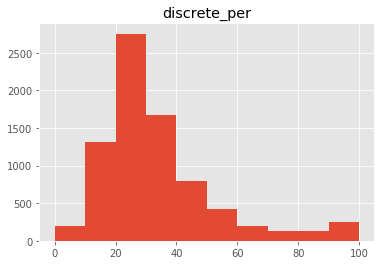

In [770]:
species_result_attr.hist('discrete_per')

In [771]:
overall_result = species_result_attr.pivot_table(values='id_no', 
                                columns='discrete_per', aggfunc=np.count_nonzero, fill_value=0)

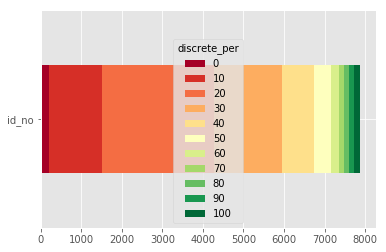

In [773]:
overall_result.plot.barh(stacked=True, cmap='RdYlGn')

In [781]:
def gap_table(df):
    # df: the filtered 'species_result_attr'
    return df.pivot_table(index='class', values='id_no', 
                                columns='discrete_per', aggfunc=np.count_nonzero, fill_value=0, margins=True)

def gap_table_normalise(df):
    return pd.crosstab(df['class'], df['discrete_per'],
            values='id_no', aggfunc=np.count_nonzero, normalize='index')

In [784]:
species_result_attr.head()

,binomial,class,code,count,count_protected,discrete_per,family,genus,id_no,kingdom,order_,per,phylum
9913,Acerodon celebensis,MAMMALIA,VU,2285,478.0,30,PTEROPODIDAE,Acerodon,137,ANIMALIA,CHIROPTERA,0.209190,CHORDATA
9902,Acerodon humilis,MAMMALIA,EN,24,12.0,50,PTEROPODIDAE,Acerodon,138,ANIMALIA,CHIROPTERA,0.500000,CHORDATA
11984,Acerodon jubatus,MAMMALIA,EN,2078,556.0,30,PTEROPODIDAE,Acerodon,139,ANIMALIA,CHIROPTERA,0.267565,CHORDATA
7337,Acerodon leucotis,MAMMALIA,VU,220,190.0,90,PTEROPODIDAE,Acerodon,140,ANIMALIA,CHIROPTERA,0.863636,CHORDATA
13884,Acerodon mackloti,MAMMALIA,VU,1053,271.0,30,PTEROPODIDAE,Acerodon,142,ANIMALIA,CHIROPTERA,0.257360,CHORDATA


In [783]:
gap_table(species_result_attr)

discrete_per,0,10,20,30,40,50,60,70,80,90,100,All
class,,,,,,,,,,,,
ACTINOPTERYGII,103,839,1636,591,271,128,60,42,26,33,53,3782
AGARICOMYCETES,0,0,0,1,0,1,0,0,2,3,1,8
AMPHIBIA,3,20,61,65,33,22,7,10,5,3,9,238
AVES,34,152,458,470,208,114,50,19,29,19,35,1588
BIVALVIA,1,5,28,23,6,2,0,0,0,1,1,67
CEPHALASPIDOMORPHI,0,0,1,1,0,0,0,1,0,1,0,4
CHONDRICHTHYES,2,80,126,48,18,7,0,1,2,1,0,285
CLITELLATA,0,0,0,0,0,0,0,0,0,0,2,2
GASTROPODA,2,1,19,17,5,4,1,4,13,2,4,72


In [785]:
gap_table_normalise(species_result_attr)

discrete_per,0,10,20,30,40,50,60,70,80,90,100
class,,,,,,,,,,,
ACTINOPTERYGII,0.027234,0.221840,0.432575,0.156267,0.071655,0.033845,0.015865,0.011105,0.006875,0.008726,0.014014
AGARICOMYCETES,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.250000,0.375000,0.125000
AMPHIBIA,0.012605,0.084034,0.256303,0.273109,0.138655,0.092437,0.029412,0.042017,0.021008,0.012605,0.037815
AVES,0.021411,0.095718,0.288413,0.295970,0.130982,0.071788,0.031486,0.011965,0.018262,0.011965,0.022040
BIVALVIA,0.014925,0.074627,0.417910,0.343284,0.089552,0.029851,0.000000,0.000000,0.000000,0.014925,0.014925
CEPHALASPIDOMORPHI,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000
CHONDRICHTHYES,0.007018,0.280702,0.442105,0.168421,0.063158,0.024561,0.000000,0.003509,0.007018,0.003509,0.000000
CLITELLATA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
GASTROPODA,0.027778,0.013889,0.263889,0.236111,0.069444,0.055556,0.013889,0.055556,0.180556,0.027778,0.055556


***Rodrigues 2004* style graph**

In [779]:
def gap_graph(df, title):
    # df: the filtered 'species_result_attr'
    # 1. pivot table for margin count
    # 2. cross tabulation for normalise count
    pvt = gap_table(df)
    ctb = gap_table_normalise(df)
    
    # 3. plot
    fig, axes = plt.subplots(1, figsize=(12,14))
    ctb.sort_index(ascending=False).plot.barh(stacked=True, cmap='RdYlGn', ax=axes)
    
    # fine tune graph
    axes.legend(loc='lower center', bbox_to_anchor=(0.5,-0.1), ncol=11)
    axes.set_title(title)
    axes.set_ylabel('')

    # use the margin column 'All', i.e. sum
    for i, each in enumerate(zip(pvt.index, pvt['All'])):
        axes.annotate(s='{:.0f}'.format(each[1]), xy=(1.005, ctb.index.size-1-i), verticalalignment='center')
        
#     return fig

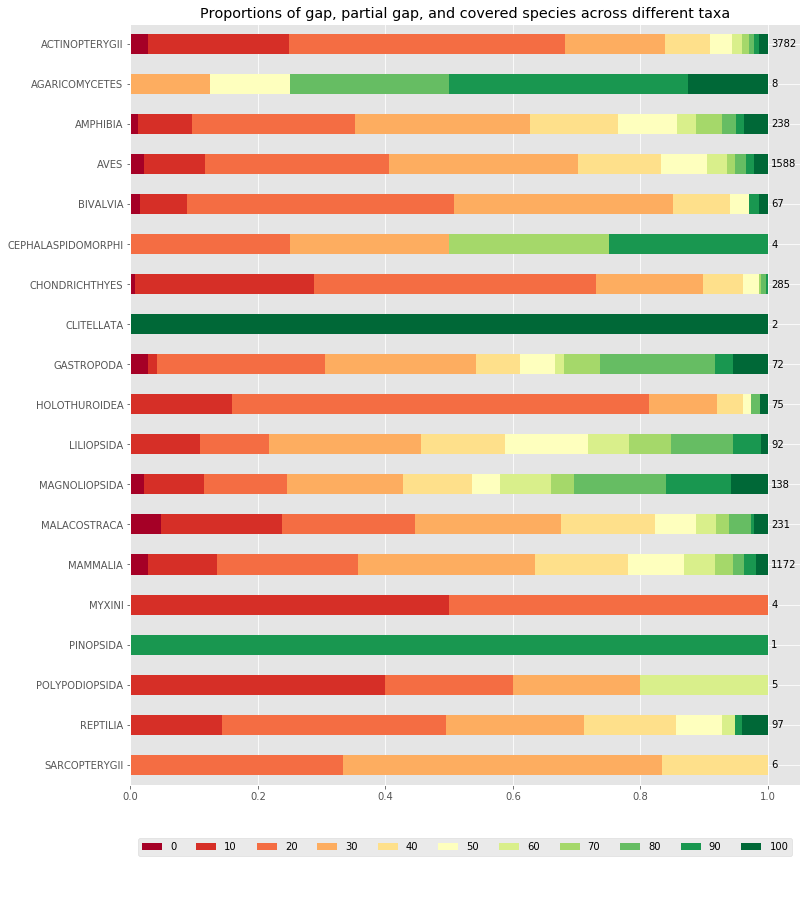

In [780]:
gap_graph(species_result_attr, title='Proportions of gap, partial gap, and covered species across different taxa')

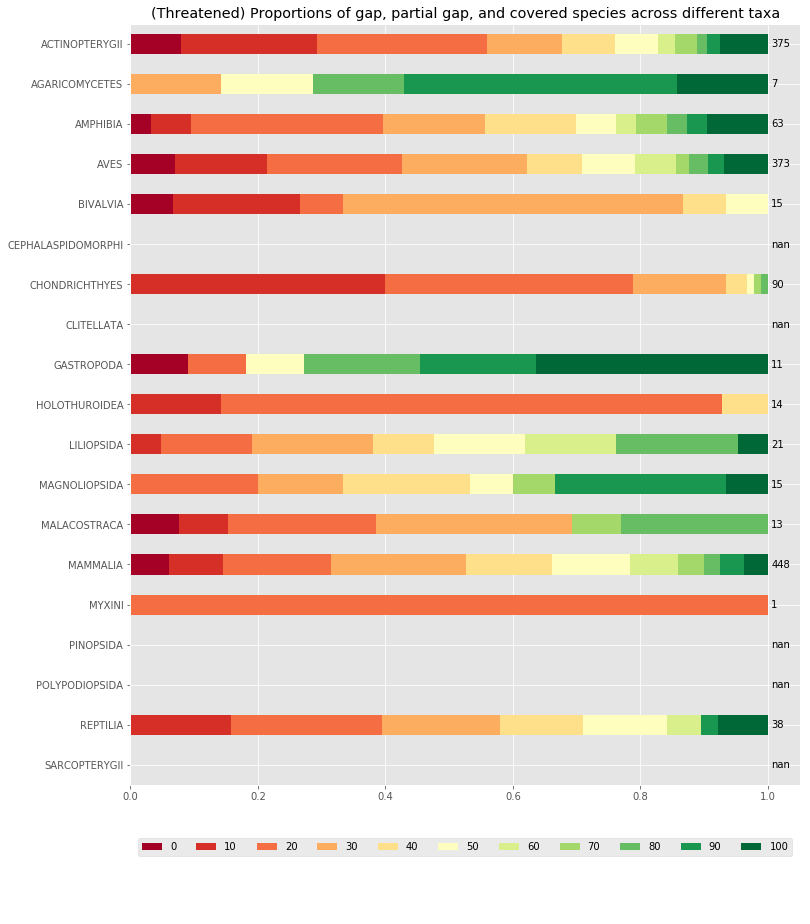

In [776]:
gap_graph(species_result_attr[species_result_attr.code.isin(['VU', 'CR', 'EN'])],
        title='(Threatened) Proportions of gap, partial gap, and covered species across different taxa')

In [791]:
import seaborn as sns

E:\anaconda\envs\pydata36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
E:\anaconda\envs\pydata36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\anaconda\envs\pydata36\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


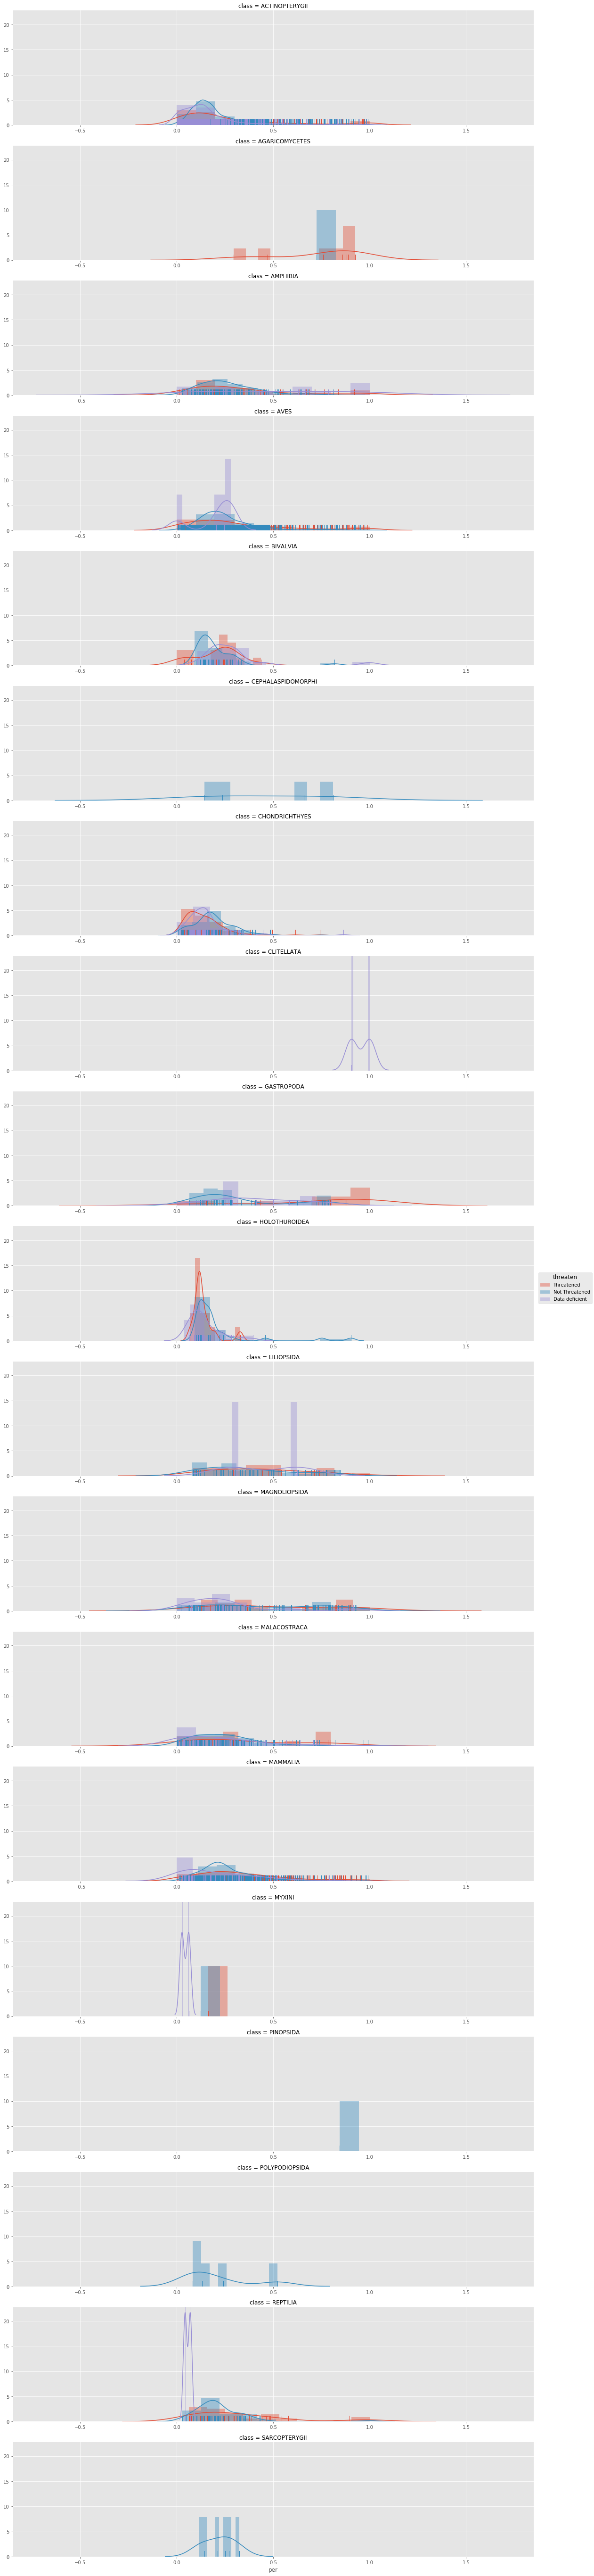

In [814]:
g = sns.FacetGrid(species_result_attr, row='class', 
                  hue='threaten', 
                  size=4, aspect=4
                 )
g = (g.map(sns.distplot, 'per', bins=10, rug=True)).add_legend()

In [846]:
aves = species_result_attr[species_result_attr['class'] =='AVES']

In [ ]:
# plt.figure(figsize=(15,5))
sns.lmplot('count', 'per', data=aves, hue='threaten', fit_reg=False, size=12)

## TEST - DO NOT USE

In [119]:
import datetime, time

In [137]:
datetime.datetime.now().strftime('%c')


'Fri Nov 24 09:28:55 2017'

In [135]:
a.strftime('%x-%X')

'11/24/17-09:11:37'

In [136]:
a.strftime('%c')

'Fri Nov 24 09:11:37 2017'

In [125]:
time.time()

1511514626.670678

In [127]:
datetime.datetime.fromtimestamp(time.time())

datetime.datetime(2017, 11, 24, 9, 11, 5, 140678)

In [300]:
bfa_sample1 = bfa_hex.head(10000)
bfa_sample2 = bfa_hex.tail(10000)

In [304]:
bfa_sample1_valid = bfa_sample1[~bfa_sample1.hexid.isin(invalid_hex.hexid)]

In [305]:
bfa_sample1_valid.head()

,row_id,hexid
0,7,1596246
1,7,1601353
2,7,1602073
3,7,1602074
4,7,1602075


In [346]:
bfa_hex_lu_filter.head()

,row_id,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
0,1,182562,Labeo cyclopinnis,2,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Labeo,LC
1,2,182562,Labeo cyclopinnis,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Labeo,LC
2,3,166467,Rasbora daniconius,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Rasbora,LC
3,4,170066,Panulirus longipes,1,1,1,ANIMALIA,ARTHROPODA,MALACOSTRACA,DECAPODA,PALINURIDAE,Panulirus,LC
4,5,178108,Sphyraena lucasana,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,SPHYRAENIDAE,Sphyraena,DD


In [347]:
bfa_sample1_valid_join2 = pd.merge(bfa_sample1_valid, bfa_hex_lu_filter, on='row_id')

In [348]:
bfa_sample1_valid_join2.head()

,row_id,hexid,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
0,7,1596246,19378668,Luciobarbus kottelati,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Luciobarbus,VU
1,7,1601353,19378668,Luciobarbus kottelati,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Luciobarbus,VU
2,7,1602073,19378668,Luciobarbus kottelati,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Luciobarbus,VU
3,7,1602074,19378668,Luciobarbus kottelati,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Luciobarbus,VU
4,7,1602075,19378668,Luciobarbus kottelati,1,1,1,ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Luciobarbus,VU


In [367]:
timeit bfa_sample1_valid_join2.pivot_table(values='hexid', index=['id_no'],aggfunc=count_unique, fill_value=0)

5.47 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [368]:
timeit bfa_sample1_valid_join2.groupby('id_no').hexid.nunique()

1.27 ms ± 71.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [308]:
bfa_sample1_valid_join = bfa_sample1_valid.join(bfa_hex_lu_filter, on='row_id', rsuffix='r_')

In [309]:
bfa_sample1_valid_join.head()

,row_id,hexid,row_idr_,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
0,7,1596246,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC
1,7,1601353,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC
2,7,1602073,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC
3,7,1602074,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC
4,7,1602075,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC


In [311]:
bfa_sample1_valid_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9680 entries, 0 to 9999
Data columns (total 15 columns):
row_id      9680 non-null uint32
hexid       9680 non-null uint32
row_idr_    9680 non-null uint16
id_no       9680 non-null uint32
binomial    9680 non-null category
presence    9680 non-null uint8
origin      9680 non-null uint8
seasonal    9680 non-null uint8
kingdom     9680 non-null category
phylum      9680 non-null category
class       9680 non-null category
order_      9680 non-null category
family      9680 non-null category
genus       9680 non-null category
code        9680 non-null category
dtypes: category(8), uint16(1), uint32(3), uint8(3)
memory usage: 865.1 KB


In [317]:
bfa_sample1_valid_join.binomial.unique()

[Oriolus chinensis, Megaptera novaeangliae, Rasbora daniconius, Lamprologus tigripictilis, Stichopus horrens]
Categories (5, object): [Oriolus chinensis, Megaptera novaeangliae, Rasbora daniconius, Lamprologus tigripictilis, Stichopus horrens]

In [331]:
a = bfa_sample1_valid_join.pivot_table(values='hexid', index=['id_no'],aggfunc=count_unique, fill_value=0)

In [323]:
wdpa_hex[wdpa_hex.wdpaid.isin(wdpa_hex_lu_filter.WDPAID)].hexid.size

1253842

In [327]:
bfa_sample1_valid_protected = bfa_sample1[(~bfa_sample1.hexid.isin(invalid_hex.hexid)) & (bfa_sample1.hexid.isin(protected_hexid))]

In [329]:
bfa_sample1_valid_protected_join =  bfa_sample1_valid_protected.join(bfa_hex_lu_filter, on='row_id', rsuffix='r_')

In [436]:
bfa_sample1_valid_protected_join.head()

,row_id,hexid,row_idr_,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
158,7,1599889,8,22706394,Oriolus chinensis,1,1,1,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ORIOLIDAE,Oriolus,LC
225,5,2678784,6,13006,Megaptera novaeangliae,1,1,1,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,BALAENOPTERIDAE,Megaptera,LC
226,5,2678785,6,13006,Megaptera novaeangliae,1,1,1,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,BALAENOPTERIDAE,Megaptera,LC
227,5,2678786,6,13006,Megaptera novaeangliae,1,1,1,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,BALAENOPTERIDAE,Megaptera,LC
228,5,2678787,6,13006,Megaptera novaeangliae,1,1,1,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,BALAENOPTERIDAE,Megaptera,LC


In [332]:
aa = bfa_sample1_valid_protected_join.pivot_table(values='hexid', index=['id_no'],aggfunc=count_unique, fill_value=0)

In [341]:
a.head()

,hexid
id_no,
13006,4492
166467,677
180488,4152
182471,154
22706394,205


In [342]:
aa.head()

,hexid
id_no,
13006,736
166467,48
180488,1078
22706394,1


In [340]:
a.join(aa, rsuffix='_p')

,hexid,hexid_p
id_no,,
13006,4492,736.0
166467,677,48.0
180488,4152,1078.0
182471,154,NaN
22706394,205,1.0


In [369]:
def count_hex(df):
    # df in the form of id, hex_id
    df_join = pd.merge(df, bfa_hex_lu_filter, on='row_id')
    return df_join.groupby('id_no').hexid.nunique()

def count_protected_hex(df):
    df_protected = df[df.hexid.isin(protected_hexid)]
    return count_hex(df_protected)

def reduce_hex(a, b):
    return a.append(b).groupby('id_no').sum()

In [376]:
a = count_hex(bfa_sample1_valid)

In [408]:
aa = count_protected_hex(bfa_sample1_valid)

In [414]:
pd.concat([a, aa], axis=1)

,hexid,hexid
id_no,,
178108,4492,736.0
182471,154,NaN
182562,677,48.0
19378668,205,1.0
22706394,4152,1078.0


In [378]:
b = count_hex(bfa_sample2)

In [381]:
bb = count_protected_hex(bfa_sample2)

In [380]:
b

id_no
18214519    10000
Name: hexid, dtype: int64

In [382]:
bb

id_no
18214519    808
Name: hexid, dtype: int64

In [384]:
pd.merge?

In [386]:
timeit a.append(b)

508 µs ± 68.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [390]:
timeit pd.concat([a,b])

483 µs ± 51.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [391]:
a

id_no
178108      4492
182471       154
182562       677
19378668     205
22706394    4152
Name: hexid, dtype: int64

In [392]:
aa = a.append(a)

In [393]:
aa

id_no
178108      4492
182471       154
182562       677
19378668     205
22706394    4152
178108      4492
182471       154
182562       677
19378668     205
22706394    4152
Name: hexid, dtype: int64

In [396]:
aa.groupby('id_no').sum()

id_no
178108      8984
182471       308
182562      1354
19378668     410
22706394    8304
Name: hexid, dtype: int64

In [399]:
reduce_hex(a,a)

id_no
178108      8984
182471       308
182562      1354
19378668     410
22706394    8304
Name: hexid, dtype: int64

In [400]:
reduce_hex(a,b)

id_no
178108       4492
182471        154
182562        677
18214519    10000
19378668      205
22706394     4152
Name: hexid, dtype: int64

In [402]:
from functools import reduce

In [406]:
reduce(reduce_hex, [a,b,a,a,b])

id_no
178108      13476
182471        462
182562       2031
18214519    20000
19378668      615
22706394    12456
Name: hexid, dtype: int64

In [407]:
aa

id_no
178108      4492
182471       154
182562       677
19378668     205
22706394    4152
178108      4492
182471       154
182562       677
19378668     205
22706394    4152
Name: hexid, dtype: int64

In [598]:
species_result_attr.head()

,count,count_protected,per,id_no,binomial,kingdom,phylum,class,order_,family,genus,code,discrete_per
9913,2285,478.0,0.209190,137,Acerodon celebensis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU,30
9902,24,12.0,0.500000,138,Acerodon humilis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,EN,50
11984,2078,556.0,0.267565,139,Acerodon jubatus,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,EN,30
7337,220,190.0,0.863636,140,Acerodon leucotis,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU,90
13884,1053,271.0,0.257360,142,Acerodon mackloti,ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon,VU,30


In [606]:
aa = species_result_attr.pivot_table(index='class', values='id_no', 
                                columns='discrete_per', aggfunc=np.count_nonzero, fill_value=0, margins=True)

In [657]:
a = pd.crosstab(species_result_attr['class'], species_result_attr['discrete_per'],
            values='id_no', aggfunc=np.count_nonzero, normalize='index')
a.fillna(0)

discrete_per,0,10,20,30,40,50,60,70,80,90,100
class,,,,,,,,,,,
ACTINOPTERYGII,0.027379,0.219564,0.433014,0.157097,0.072036,0.034024,0.015949,0.011164,0.006911,0.008772,0.014088
AGARICOMYCETES,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.250000,0.375000,0.125000
AMPHIBIA,0.012605,0.084034,0.256303,0.273109,0.138655,0.092437,0.029412,0.042017,0.021008,0.012605,0.037815
AVES,0.021411,0.095718,0.288413,0.295970,0.130982,0.071788,0.031486,0.011965,0.018262,0.011965,0.022040
BIVALVIA,0.014925,0.074627,0.417910,0.343284,0.089552,0.029851,0.000000,0.000000,0.000000,0.014925,0.014925
CEPHALASPIDOMORPHI,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000
CHONDRICHTHYES,0.007067,0.282686,0.438163,0.169611,0.063604,0.024735,0.000000,0.003534,0.007067,0.003534,0.000000
CLITELLATA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
GASTROPODA,0.027778,0.013889,0.263889,0.236111,0.069444,0.055556,0.013889,0.055556,0.180556,0.027778,0.055556


In [656]:
a

discrete_per,0,10,20,30,40,50,60,70,80,90,100
class,,,,,,,,,,,
ACTINOPTERYGII,0.027379,0.219564,0.433014,0.157097,0.072036,0.034024,0.015949,0.011164,0.006911,0.008772,0.014088
AGARICOMYCETES,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.250000,0.375000,0.125000
AMPHIBIA,0.012605,0.084034,0.256303,0.273109,0.138655,0.092437,0.029412,0.042017,0.021008,0.012605,0.037815
AVES,0.021411,0.095718,0.288413,0.295970,0.130982,0.071788,0.031486,0.011965,0.018262,0.011965,0.022040
BIVALVIA,0.014925,0.074627,0.417910,0.343284,0.089552,0.029851,0.000000,0.000000,0.000000,0.014925,0.014925
CEPHALASPIDOMORPHI,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000
CHONDRICHTHYES,0.007067,0.282686,0.438163,0.169611,0.063604,0.024735,0.000000,0.003534,0.007067,0.003534,0.000000
CLITELLATA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
GASTROPODA,0.027778,0.013889,0.263889,0.236111,0.069444,0.055556,0.013889,0.055556,0.180556,0.027778,0.055556


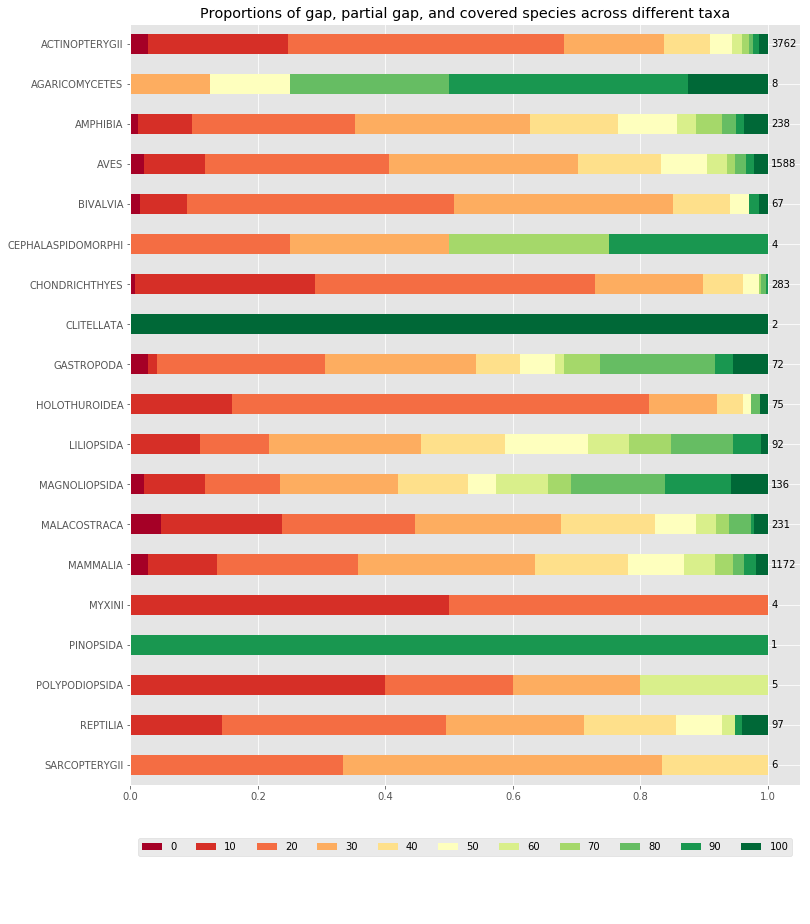

In [651]:
gap_graph(species_result_attr, title='Proportions of gap, partial gap, and covered species across different taxa')

Looking at mammals for example

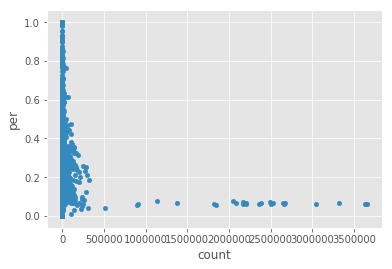

In [466]:
species_result_attr[species_result_attr['class']=='MAMMALIA'].plot.scatter('count', 'per')

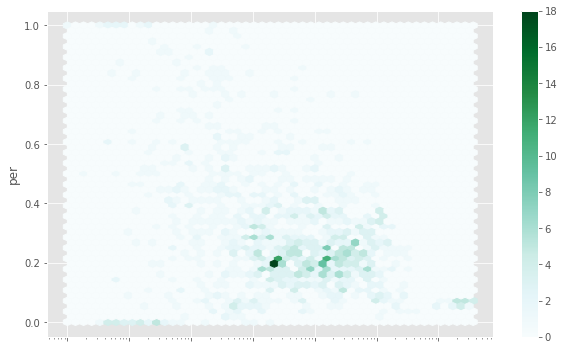

In [474]:
species_result_attr[species_result_attr['class']=='MAMMALIA'].plot.hexbin(x='count', y='per',
                                                                          gridsize=50, xscale='log',
#                                                                           color='red'
                                                                         )

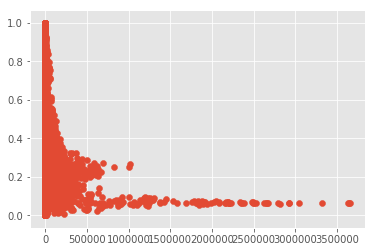

In [461]:
plt.scatter(species_result_attr['count'], species_result_attr['per'])

TEST

In [700]:
wdpa_hex.columns

Index(['wdpaid', 'hexid'], dtype='object')

In [702]:
bfa_hex.columns

Index(['row_id', 'hexid'], dtype='object')

In [707]:
bfa_hex[bfa_hex.row_id==8440]

,row_id,hexid


In [703]:
bfa_hex.head()

,row_id,hexid
0,7,1596246
1,7,1601353
2,7,1602073
3,7,1602074
4,7,1602075


In [706]:
bfa_hex_lu_filter[bfa_hex_lu_filter.id_no==60121]

,row_id,id_no,binomial,presence,origin,seasonal,kingdom,phylum,class,order_,family,genus,code
8439,8440,60121,Aetomylaeus vespertilio,1,1,1,ANIMALIA,CHORDATA,CHONDRICHTHYES,MYLIOBATIFORMES,MYLIOBATIDAE,Aetomylaeus,EN


In [778]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is A2BF-3D1C

 Directory of E:\Yichuan\Barbara_IUCN

30/11/2017  15:03    <DIR>          .
30/11/2017  15:03    <DIR>          ..
28/11/2017  11:30                53 .gitignore
22/11/2017  15:05    <DIR>          .ipynb_checkpoints
24/11/2017  13:13           103,834 bfa_sis.csv
28/11/2017  08:57         4,339,727 bfa_species_lookup.csv
28/11/2017  08:57            13,226 bfa_species_lookup.txt.xml
30/11/2017  15:03           511,374 Biodiversity for food and agriculture.ipynb
24/11/2017  10:38    <DIR>          cacti
30/11/2017  14:32         4,489,216 data.mxd
22/11/2017  14:55         2,246,426 Food_FAO_2017_2.csv
29/11/2017  12:23             6,118 hex.png
28/11/2017  07:44     1,205,674,400 hex_bfa.csv.gz
30/11/2017  13:42           197,960 hex_bfa_add.csv.gz
30/11/2017  14:00        38,450,111 hex_bfa_add_dice.csv.gz
30/11/2017  14:34         1,758,801 hex_bfa_add_dice_still_fail.csv.gz
28/11/2017  07:09             7,101 hex